In [1]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import intertwined_prov

from datetime import datetime
def time():
    return datetime.now().strftime("%Y-%m-%dT%H:%M:%S.%f")


In [2]:
from pprint import pprint
import annotations as prov

3


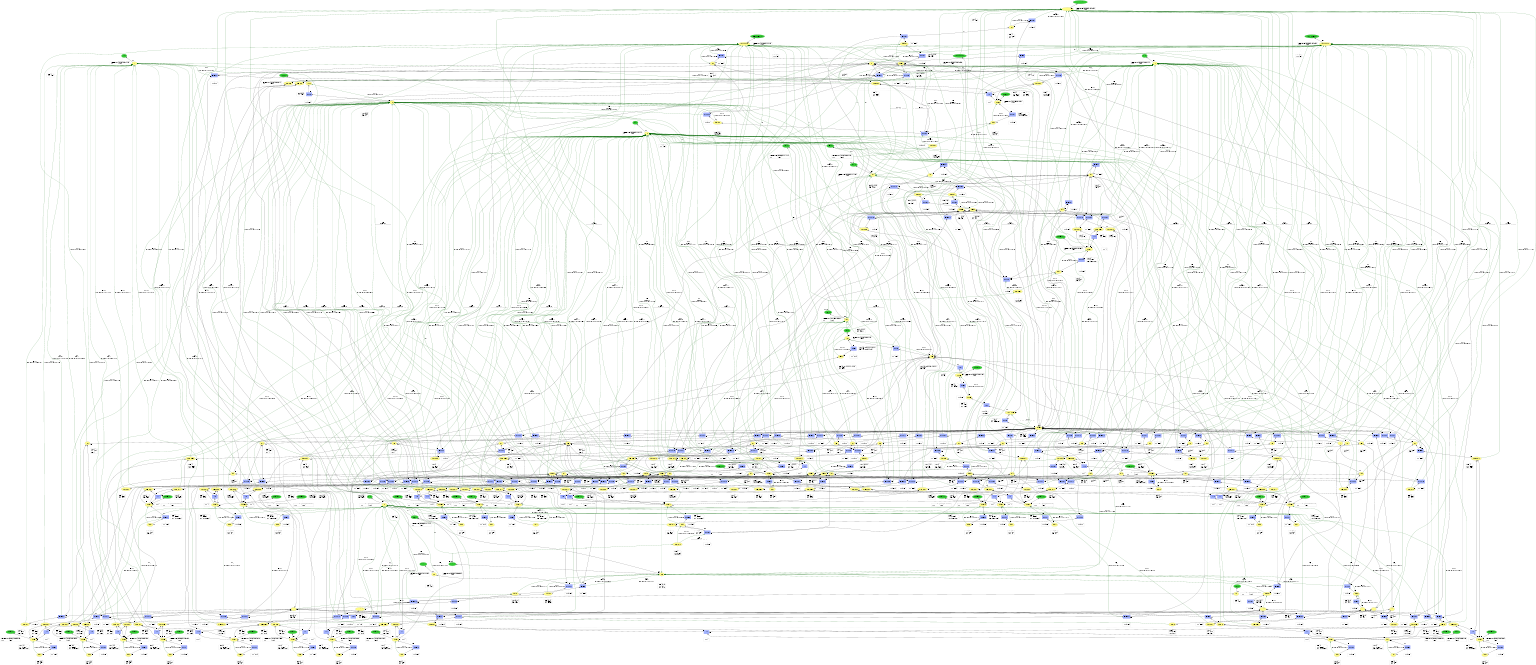

[('used', 342),
 ('entity', 270),
 ('activity', 211),
 ('wasGeneratedBy', 207),
 ('referenceDerivedFrom', 181),
 ('usedPart', 134),
 ('wasDerivedFrom', 54),
 ('specializationOf', 46),
 ('hadDictionaryMember', 15),
 ('derivedByInsertionFrom', 3),
 ('partGeneratedBy', 3)]


In [9]:
import importlib
import annotations as prov
importlib.reload(prov)
prov.reset_prov("../intertwined_prov/temp/")

def get_item(ent, pos):
    follow_ref = prov.SAME[ent]
    follow_value = prov.VALUES[follow_ref]
    return prov.DICTS[follow_value][str(pos)]
    
    

# Line 1
m = 10000 # max value

with prov.desc("L1 - assign"):
    e_n10000 = prov.entity("10000", "10000", "literal", None)
    prov.specializationOf(e_n10000, prov.version(e_n10000, time()))

    e_m = prov.entity("m", "10000", "name", "m")
    prov.activity("assign", [("--d", time(), e_m, e_n10000)])


    
# Line 2
result = dist = [
    [0, 1, 4],
    [m, 0, 2],
    [2, m, 0],
]

with prov.desc("L2 - list definition / assign"):
    
    with prov.desc("L2 - list definition"):
        e_n0 = prov.entity("0", "0", "literal", None)
        prov.specializationOf(e_n0, prov.version(e_n0, time()))
        e_n1 = prov.entity("1", "1", "literal", None)
        prov.specializationOf(e_n1, prov.version(e_n1, time()))
        e_n2 = prov.entity("2", "2", "literal", None)
        prov.specializationOf(e_n2, prov.version(e_n2, time()))
        e_n4 = prov.entity("4", "4", "literal", None)
        prov.specializationOf(e_n4, prov.version(e_n4, time()))

        prov_dist = [
            [e_n0, e_n1, e_n4],
            [e_m, e_n0, e_n2],
            [e_n2, e_m, e_n0],
        ]
        prov_label = [
            ["0", "1", "4"],
            ["m", "0", "2"],
            ["2", "m", "0"]
        ]

        ti = time()

        e_list = prov.entity("list", repr(dist), "list", prov.calc_label(prov_label))
        e_list_v = prov.version(e_list, ti)
        prov.specializationOf(e_list, e_list_v)

        for i, (pdist, plabel) in enumerate(zip(prov_dist, prov_label)):
            e_row = prov.entity("list{}".format(i), repr(dist[i]), "list", prov.calc_label(plabel))
            e_row_v = prov.version(e_row, ti)
            prov.specializationOf(e_row, e_row_v)
            prov.hadDictionaryMember(e_list_v, e_row, str(i))
            for j, (ppdist, pplabel) in enumerate(zip(pdist, plabel)):
                prov.hadDictionaryMember(e_row_v, ppdist, str(j))

        

        
    with prov.desc("L2 - assign"):
        e_dist = prov.entity("dist", repr(dist), "name", "dist")
        prov.activity("assign", [("--d", time(), e_dist, e_list)])

        e_result = prov.entity("result", repr(result), "name", "result")
        prov.activity("assign", [("--d", time(), e_result, e_list)])


# Line 7
nodes = len(dist)

with prov.desc("L7 - func call / assign"):
    e_ret = prov.entity("len_dist", repr(nodes), "eval", "len(dist)")
    prov.specializationOf(e_ret, prov.version(e_ret, time()))
    prov.activity("call", [], [e_dist], [e_ret], label="len")
    
    e_nodes = prov.entity("nodes", repr(nodes), "name", "nodes")
    prov.activity("assign", [("--d", time(), e_nodes, e_ret)])

# Line 8
indexes = range(nodes)

with prov.desc("L8 - func call / list assign"):
    ti = time()
    e_ret = prov.entity("range_nodes", repr(list(indexes)), "eval", "range(nodes)")
    e_ret_v = prov.version(e_ret, ti)
    prov.specializationOf(e_ret, e_ret_v)
    e_items = []
    for i in indexes:
        e_item = prov.entity("range_nodes{}".format(i), str(i), "item", None)
        prov.specializationOf(e_item, prov.version(e_item, ti))
        prov.hadDictionaryMember(e_ret_v, e_item, str(i))
    prov.activity("call", [], [e_nodes], [e_ret], label="range")
    
    e_indexes = prov.entity("indexes", repr(list(indexes)), "name", "indexes")
    prov.activity("assign", [("--d", time(), e_indexes, e_ret)])

    
# Line 9
for k in indexes:
    with prov.desc("L9 - loop access"):
        e_k = prov.entity("k", k, "name", "k")
        item = get_item(e_indexes, k)
        prov.activity("access", [("--dp", time(), e_indexes, str(k), e_k, item)], used=[e_indexes])
    
    # Line 10
    distk = dist[k]
    
    with prov.desc("L10 - access / assign"):
        e_dist_ak = prov.entity("dist_ak", repr(distk), "list", "dist[k]")
        item = get_item(e_dist, k)
        prov.activity("access", [("--dp", time(), e_dist, str(k), e_dist_ak, item)], used=[e_dist, e_k])

        e_distk = prov.entity("distk", repr(distk), "list", "distk")
        prov.activity("assign", [("--d", time(), e_distk, e_dist_ak)])
    
    # Line 11
    for i in indexes:
        with prov.desc("L11 - loop access"):
            e_i = prov.entity("i", i, "name", "i")
            item = get_item(e_indexes, i)
            prov.activity("access", [("--dp", time(), e_indexes, str(i), e_i, item)], used=[e_indexes])
        
        # Line 12
        disti = dist[i]
           
        with prov.desc("L12 - access / assign"):
            e_dist_ai = prov.entity("dist_ai", repr(disti), "list", "dist[i]")
            item = get_item(e_dist, i)
            prov.activity("access", [("--dp", time(), e_dist, str(i), e_dist_ai, item)], used=[e_dist, e_i])

            e_disti = prov.entity("disti", repr(disti), "list", "disti")
            prov.activity("assign", [("--d", time(), e_disti, e_dist_ai)])
        
        # Line 13
        for j in indexes:
            with prov.desc("L13 - loop access"):
                e_j = prov.entity("j", j, "name", "j")
                item = get_item(e_indexes, j)
                prov.activity("access", [("--dp", time(), e_indexes, str(j), e_j, item)], used=[e_indexes])
            
            # Line 14
            ikj = disti[k] + distk[j]
            
            with prov.desc("L14 - access / access / operation / assign"):
                e_disti_ak = prov.entity("disti_ak", repr(disti[k]), "access", "disti[k]")
                item = get_item(e_disti, k)
                prov.activity("access", [("--dp", time(), e_disti, str(k), e_disti_ak, item)], used=[e_disti, e_k])
                
                e_distk_aj = prov.entity("distk_aj", repr(distk[j]), "access", "distk[j]")
                item = get_item(e_distk, j)
                prov.activity("access", [("--dp", time(), e_distk, str(j), e_distk_aj, item)], used=[e_distk, e_j])
                
                e_sum = prov.entity("sum", repr(ikj), "operation", "disti[k] + distk[j]")
                prov.specializationOf(e_sum, prov.version(e_sum, time()))
                prov.activity("+", [(e_sum, e_disti_ak, e_distk_aj)])
                
                e_ikj = prov.entity("ikj", repr(ikj), "name", "ikj")
                prov.activity("assign", [("--d", time(), e_ikj, e_sum)])
            
            
            # Line 15
            with prov.desc("L15 - access"):
                e_disti_aj = prov.entity("disti_aj", repr(disti[j]), "access", "disti[j]")
                item = get_item(e_disti, j)
                prov.activity("access", [("--dp", time(), e_disti, str(k), e_disti_aj, item)], used=[e_disti, e_j])
            if disti[j] > ikj:
                
                # Line 16
                disti[j] = ikj
                

                with prov.desc("L16 - part assign with propagation"):
                    derived = []
                    used = [e_disti, e_j]
                    used.append(e_disti_aj) # from if
                    
                    generated = []
                    
                    ti = time()
                    e_disti_aj = prov.entity("disti_aj", repr(ikj), "access", "disti[j]")
                    follow_ref = prov.SAME[e_disti]
                    follow_value = prov.VALUES[follow_ref]
                    
                    e_disti_v = prov.version(follow_ref, ti)
                    prov.derivedByInsertionFrom(e_disti_v, follow_value, {"1": e_disti_aj})
                    prov.specializationOf(follow_ref, e_disti_v)
                    
                    prov.activity("assign", [("--gd", ti, e_disti, str(j), e_disti_aj, e_ikj)], used=used)
                    
                    
# Line 17
print(result[0][2])

with prov.desc("L17 - access / access / call"):
    e_n0 = prov.entity("0", "0", "literal", None)
    prov.specializationOf(e_n0, prov.version(e_n0, time()))
    e_n2 = prov.entity("2", "2", "literal", None)
    prov.specializationOf(e_n2, prov.version(e_n2, time()))
    
    e_result_a0 = prov.entity("result_a0", repr(result[0]), "access", "result[0]")
    item = get_item(e_result, "0")
    prov.activity("access", [("--dp", time(), e_result, "0", e_result_a0, item)], used=[e_result, e_n0])
    

    e_result_a02 = prov.entity("result_a02", repr(result[0][2]), "access", "result[0][2]")
    item = get_item(e_result_a0, "2")
    prov.activity("access", [("--dp", time(), e_result_a0, "2", e_result_a02, item)], used=[e_result_a0, e_n2])
    
    prov.activity("print", [], [e_result_a02])
                   

pprint(prov.stats("../intertwined_prov/floydwarshall", True))


In [4]:
ip = get_ipython()